# Introduction

In this project, you will build a neural network of your own design to evaluate the MNIST dataset.

Some of the benchmark results on MNIST include can be found [on Yann LeCun's page](https://webcache.googleusercontent.com/search?q=cache:stAVPik6onEJ:yann.lecun.com/exdb/mnist) and include:

88% [Lecun et al., 1998](https://hal.science/hal-03926082/document)

95.3% [Lecun et al., 1998](https://hal.science/hal-03926082v1/document)

99.65% [Ciresan et al., 2011](http://people.idsia.ch/~juergen/ijcai2011.pdf)


MNIST is a great dataset for sanity checking your models, since the accuracy levels achieved by large convolutional neural networks and small linear models are both quite high. This makes it important to be familiar with the data.

## Installation

In [1]:
# Update the PATH to include the user installation directory.
import os
os.environ['PATH'] = f"{os.environ['PATH']}:/root/.local/bin"

# Restart the Kernel before you move on to the next step.

#### Important: Restart the Kernel before you move on to the next step.

In [2]:
# Install requirements
#!python -m pip install -r requirements.txt

## Imports

In [3]:
## This cell contains the essential imports you will need – DO NOT CHANGE THE CONTENTS! ##
import os
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
import numpy as np

## Load the Dataset

Specify your transforms as a list if you intend to .
The transforms module is already loaded as `transforms`.

MNIST is fortunately included in the torchvision module.
Then, you can create your dataset using the `MNIST` object from `torchvision.datasets` ([the documentation is available here](https://pytorch.org/vision/stable/datasets.html#mnist)).
Make sure to specify `download=True`!

Once your dataset is created, you'll also need to define a `DataLoader` from the `torch.utils.data` module for both the train and the test set.

In [4]:
# Define transforms
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5,), (0.5,))
])

# Load the dataset
train_dataset = torchvision.datasets.MNIST(root='./data', train=True, transform=transform, download=True)
test_dataset = torchvision.datasets.MNIST(root='./data', train=False, transform=transform, download=True)

# Define DataLoader
train_loader = torch.utils.data.DataLoader(dataset=train_dataset, batch_size=64, shuffle=True)
test_loader = torch.utils.data.DataLoader(dataset=test_dataset, batch_size=64, shuffle=False)

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 9912422/9912422 [00:00<00:00, 50708889.30it/s]


Extracting ./data/MNIST/raw/train-images-idx3-ubyte.gz to ./data/MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 28881/28881 [00:00<00:00, 1846355.53it/s]

Extracting ./data/MNIST/raw/train-labels-idx1-ubyte.gz to ./data/MNIST/raw



Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 1648877/1648877 [00:00<00:00, 12407834.85it/s]


Extracting ./data/MNIST/raw/t10k-images-idx3-ubyte.gz to ./data/MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 4542/4542 [00:00<00:00, 2963679.02it/s]

Extracting ./data/MNIST/raw/t10k-labels-idx1-ubyte.gz to ./data/MNIST/raw



## Justify your preprocessing

In your own words, why did you choose the transforms you chose? If you didn't use any preprocessing steps, why not?

**Justification**

The preprocessing steps are applied to each of the MNIST images. First, converting the images to PyTorch Tensors, and second, normalizing the pixel values within the range of [-1, 1]. The data must be in tensor format to work with PyTorch models, and normalization can help speed up training and even increase performance, it can do this by guaranteeing that the input data’s mean is 0 and standard deviation is 1, which can aid in stabilizing and enhancing gradient-based optimization.

## Explore the Dataset
Using matplotlib, numpy, and torch, explore the dimensions of your data.

You can view images using the `show5` function defined below – it takes a data loader as an argument.
Remember that normalized images will look really weird to you! You may want to try changing your transforms to view images.
Typically using no transforms other than `toTensor()` works well for viewing – but not as well for training your network.
If `show5` doesn't work, go back and check your code for creating your data loaders and your training/test sets.

In [5]:
## This cell contains a function for showing 5 images from a dataloader – DO NOT CHANGE THE CONTENTS! ##
def show5(imgage_loader):
    img_batch = next(iter(imgage_loader))
    images, labels = img_batch
    fig, ax = plt.subplots(1, 5, figsize=(15, 3))
    for i in range(5):
        img = images[i].numpy().squeeze()
        ax[i].imshow(img, cmap='gray')
        ax[i].set_title(f'Label: {labels[i].item()}')
        ax[i].axis('off')
    plt.show()

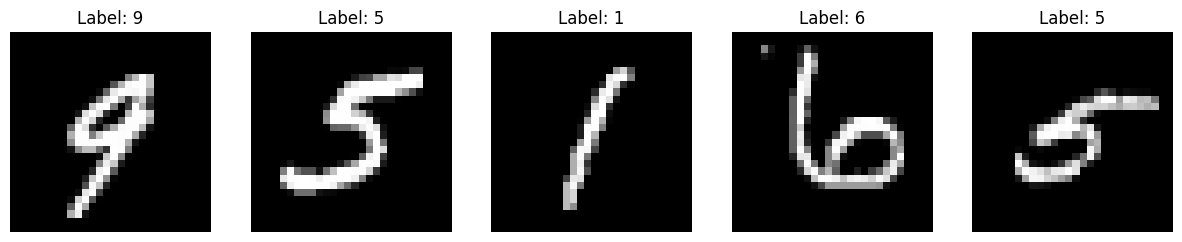

Image tensor dimention: torch.Size([64, 1, 28, 28])
Label tensor dimention: torch.Size([64])


In [6]:
# Explore data
show5(train_loader)
# Check the dimensions of the data
data_iter = next(iter(train_loader))
images, labels = data_iter
print(f'Image tensor dimention: {images.shape}')
print(f'Label tensor dimention: {labels.shape}')


## Build your Neural Network
Using the layers in `torch.nn` (which has been imported as `nn`) and the `torch.nn.functional` module (imported as `F`), construct a neural network based on the parameters of the dataset.
Use any architecture you like.

*Note*: If you did not flatten your tensors in your transforms or as part of your preprocessing and you are using only `Linear` layers, make sure to use the `Flatten` layer in your network!

In [7]:
# Define Neural Network Architecture
class MNIST_Net(nn.Module):
    def __init__(self):
        super(MNIST_Net, self).__init__()
        self.flatten = nn.Flatten()
        self.fc1 = nn.Linear(28 * 28, 128)
        self.fc2 = nn.Linear(128, 64)
        self.fc3 = nn.Linear(64, 10)
        self.dropout = nn.Dropout(0.2)

    def forward(self, x):
        x = self.flatten(x)
        x = F.relu(self.fc1(x))
        x = self.dropout(x)
        x = F.relu(self.fc2(x))
        x = self.dropout(x)
        x = self.fc3(x)
        return x

Specify a loss function and an optimizer, and instantiate the model.

If you use a less common loss function, please note why you chose that loss function in a comment.

In [8]:
# Check if GPU is available
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Instantiate the model
model = MNIST_Net().to(device)

# Define the loss function and optimizer
criterion = nn.CrossEntropyLoss()  # Commonly used for multi-class classification
optimizer = optim.Adam(model.parameters(), lr=0.001)  # Adam optimizer with a learning rate of 0.001

print(model)

MNIST_Net(
  (flatten): Flatten(start_dim=1, end_dim=-1)
  (fc1): Linear(in_features=784, out_features=128, bias=True)
  (fc2): Linear(in_features=128, out_features=64, bias=True)
  (fc3): Linear(in_features=64, out_features=10, bias=True)
  (dropout): Dropout(p=0.2, inplace=False)
)


## Running your Neural Network
Use whatever method you like to train your neural network, and ensure you record the average loss at each epoch.
Don't forget to use `torch.device()` and the `.to()` method for both your model and your data if you are using GPU!

If you want to print your loss **during** each epoch, you can use the `enumerate` function and print the loss after a set number of batches. 250 batches works well for most people!

In [9]:
# Define training function
def train_model(model, train_loader, criterion, optimizer, device, epochs=5):
    model.train()
    losses = []
    for epoch in range(epochs):
        run_loss = 0.0
        for batch_idx, (images, labels) in enumerate(train_loader):
            images, labels = images.to(device), labels.to(device)

            optimizer.zero_grad()
            outputs = model(images)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()
            run_loss += loss.item()

            if (batch_idx + 1) % 250 == 0:
                print(f'Epoch [{epoch+1}/{epochs}], Step [{batch_idx+1}/{len(train_loader)}], Loss: {loss.item():.4f}')

        avg_loss = run_loss / len(train_loader)
        losses.append(avg_loss)
        print(f'Epoch [{epoch+1}/{epochs}], Average Loss: {avg_loss:.4f}')
    return losses
# Training the model and geting the training losses
epochs = 5
train_losses = train_model(model, train_loader, criterion, optimizer, device, epochs)

Epoch [1/5], Step [250/938], Loss: 0.5612
Epoch [1/5], Step [500/938], Loss: 0.3966
Epoch [1/5], Step [750/938], Loss: 0.4519
Epoch [1/5], Average Loss: 0.4782
Epoch [2/5], Step [250/938], Loss: 0.3180
Epoch [2/5], Step [500/938], Loss: 0.1473
Epoch [2/5], Step [750/938], Loss: 0.0995
Epoch [2/5], Average Loss: 0.2538
Epoch [3/5], Step [250/938], Loss: 0.3359
Epoch [3/5], Step [500/938], Loss: 0.1798
Epoch [3/5], Step [750/938], Loss: 0.1659
Epoch [3/5], Average Loss: 0.2031
Epoch [4/5], Step [250/938], Loss: 0.0743
Epoch [4/5], Step [500/938], Loss: 0.2254
Epoch [4/5], Step [750/938], Loss: 0.0763
Epoch [4/5], Average Loss: 0.1792
Epoch [5/5], Step [250/938], Loss: 0.1605
Epoch [5/5], Step [500/938], Loss: 0.1790
Epoch [5/5], Step [750/938], Loss: 0.4815
Epoch [5/5], Average Loss: 0.1623


Plot the training loss (and validation loss/accuracy, if recorded).

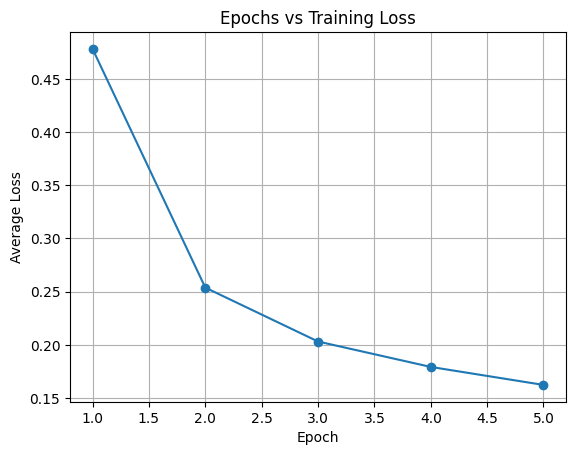

In [10]:
# Plot the training losses
plt.plot(range(1, epochs + 1), train_losses, marker='o')
plt.title('Epochs vs Training Loss')
plt.xlabel('Epoch')
plt.ylabel('Average Loss')
plt.grid(True)
plt.show()


## Testing your model
Using the previously created `DataLoader` for the test set, compute the percentage of correct predictions using the highest probability prediction.

If your accuracy is over 90%, great work, but see if you can push a bit further!
If your accuracy is under 90%, you'll need to make improvements.
Go back and check your model architecture, loss function, and optimizer to make sure they're appropriate for an image classification task.

In [12]:
# Define testing function
def test_model(model, test_loader, device):
    model.eval()
    correct_pred = 0
    total_img = 0
    with torch.no_grad():
        for images, labels in test_loader:
            images, labels = images.to(device), labels.to(device)
            outputs = model(images)
            _, predicted = torch.max(outputs.data, 1)
            total_img += labels.size(0)
            correct_pred += (predicted == labels).sum().item()
    accuracy = 100 * correct_pred / total_img
    print(f'Model Accuracy: {accuracy:.2f}%')

# Test the model
test_model(model, test_loader, device)

Model Accuracy: 96.30%


## Improving your model

Once your model is done training, try tweaking your hyperparameters and training again below to improve your accuracy on the test set!

Epoch [1/10], Step [250/938], Loss: 0.2211
Epoch [1/10], Step [500/938], Loss: 0.0877
Epoch [1/10], Step [750/938], Loss: 0.1074
Epoch [1/10], Average Loss: 0.1318
Epoch [2/10], Step [250/938], Loss: 0.1974
Epoch [2/10], Step [500/938], Loss: 0.3134
Epoch [2/10], Step [750/938], Loss: 0.1802
Epoch [2/10], Average Loss: 0.1226
Epoch [3/10], Step [250/938], Loss: 0.0683
Epoch [3/10], Step [500/938], Loss: 0.0560
Epoch [3/10], Step [750/938], Loss: 0.0911
Epoch [3/10], Average Loss: 0.1193
Epoch [4/10], Step [250/938], Loss: 0.0837
Epoch [4/10], Step [500/938], Loss: 0.1159
Epoch [4/10], Step [750/938], Loss: 0.1874
Epoch [4/10], Average Loss: 0.1142
Epoch [5/10], Step [250/938], Loss: 0.2104
Epoch [5/10], Step [500/938], Loss: 0.1459
Epoch [5/10], Step [750/938], Loss: 0.1812
Epoch [5/10], Average Loss: 0.1082
Epoch [6/10], Step [250/938], Loss: 0.1229
Epoch [6/10], Step [500/938], Loss: 0.1506
Epoch [6/10], Step [750/938], Loss: 0.1310
Epoch [6/10], Average Loss: 0.1077
Epoch [7/10], St

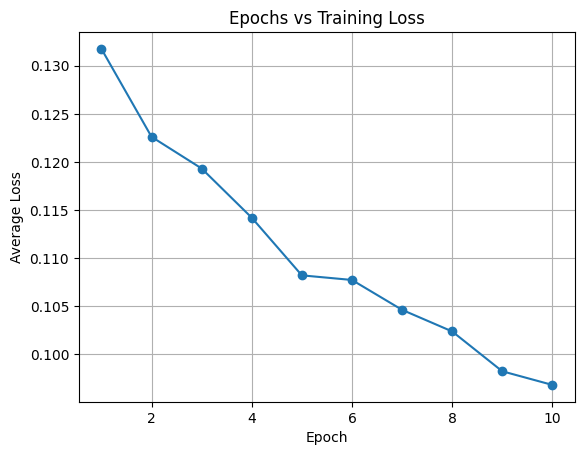

Model Accuracy: 97.52%


In [14]:
## YOUR CODE HERE ##
# Defining optimizer with lower learning rate
optimizer = optim.Adam(model.parameters(), lr=0.0005)

# Training model with a lower learning rate and with 10 epochs
epochs = 10
losses = train_model(model, train_loader, criterion, optimizer, device, epochs)

# Plot the training losses
plt.plot(range(1, epochs + 1), losses, marker='o')
plt.title('Epochs vs Training Loss')
plt.xlabel('Epoch')
plt.ylabel('Average Loss')
plt.grid(True)
plt.show()

# Test the network
test_model(model, test_loader, device)

## Saving your model
Using `torch.save`, save your model for future loading.

In [ ]:
# Save your model
torch.save(model, 'mnist_model.pth')
print("Model saved successfully!")

Model saved successfully!
